<a href="https://colab.research.google.com/github/dayli19/tic-tac-Examen/blob/main/Retail_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
file_path = 'mock_kaggle.csv'
try:
    df = pd.read_csv(file_path)
    print("¡Archivo cargado exitosamente!")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encontró.")

¡Archivo cargado exitosamente!


In [4]:
print("\n--- Primeras 5 Filas ---")
print(df.head())

print("\n--- Estructura y Tipos de Datos ---")
df.info()

print("\n--- Resumen Estadístico de Columnas Numéricas ---")
print(df.describe())


--- Primeras 5 Filas ---
         data  venda  estoque  preco
0  2014-01-01      0     4972   1.29
1  2014-01-02     70     4902   1.29
2  2014-01-03     59     4843   1.29
3  2014-01-04     93     4750   1.29
4  2014-01-05     96     4654   1.29

--- Estructura y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB

--- Resumen Estadístico de Columnas Numéricas ---
            venda      estoque       preco
count  937.000000   937.000000  937.000000
mean    90.533618  1608.258271    1.592572
std     80.682089  1356.691877    0.529502
min      0.000000     0.000000    0.000000
25%     33.000000   794.000000    1.290000
50%     76.

In [5]:
import pandas as pd
df = pd.read_csv('mock_kaggle.csv')
print("Nombres de las columnas:")
print(df.columns)

Nombres de las columnas:
Index(['data', 'venda', 'estoque', 'preco'], dtype='object')


In [6]:
# 1. Conversión de Fecha y Extracción de Variables ---

# 1.1 Convertir la columna 'data' al formato datetime
df['data'] = pd.to_datetime(df['data'])

# 1.2 Extracción de variables de tiempo relevantes para la Regresión Lineal
df['Year'] = df['data'].dt.year
df['Month'] = df['data'].dt.month
df['Day'] = df['data'].dt.day
df['WeekDay'] = df['data'].dt.dayofweek # 0=Lunes, 6=Domingo
# La siguiente línea extrae la semana del año
df['WeekOfYear'] = df['data'].dt.isocalendar().week.astype(int)

print("Preprocesamiento de fechas completado. Nuevas columnas:")
print(df.head())

Preprocesamiento de fechas completado. Nuevas columnas:
        data  venda  estoque  preco  Year  Month  Day  WeekDay  WeekOfYear
0 2014-01-01      0     4972   1.29  2014      1    1        2           1
1 2014-01-02     70     4902   1.29  2014      1    2        3           1
2 2014-01-03     59     4843   1.29  2014      1    3        4           1
3 2014-01-04     93     4750   1.29  2014      1    4        5           1
4 2014-01-05     96     4654   1.29  2014      1    5        6           1


In [7]:
# 2. Separación de X, y y División Train/Test ---

# 2.1 Definir la variable objetivo (y) y las características (X)
target_column = 'venda' # La variable a predecir
# X incluirá 'estoque', 'preco' y todas las nuevas variables de tiempo
X = df.drop(columns=[target_column, 'data'])
y = df[target_column]

# 2.2 División temporal: Usaremos el 80% de los datos para entrenar y el 20% para la prueba.
train_size = int(len(X) * 0.8)

# Datos de Entrenamiento (el 80% más antiguo)
X_train = X[:train_size]
y_train = y[:train_size]

# Datos de Prueba (el 20% más reciente)
X_test = X[train_size:]
y_test = y[train_size:]

print(f"\nConjunto de Entrenamiento (80%): {len(X_train)} filas")
print(f"Conjunto de Prueba (20%): {len(X_test)} filas")
print("\nVariables (X) finales para entrenamiento:")
print(X_train.columns)


Conjunto de Entrenamiento (80%): 749 filas
Conjunto de Prueba (20%): 188 filas

Variables (X) finales para entrenamiento:
Index(['estoque', 'preco', 'Year', 'Month', 'Day', 'WeekDay', 'WeekOfYear'], dtype='object')


In [8]:
# 3. Entrenamiento del Modelo ---
from sklearn.linear_model import LinearRegression
import joblib # Necesario para guardar el modelo (requisito del proyecto)

# 3.1 Instanciar y Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModelo de Regresión Lineal entrenado con éxito.")

# 3.2 Guardar el código (Notebook) y el Modelo (Requisito del proyecto)
# En Colab, el código se guarda automáticamente, pero debes guardar el modelo.
model_filename = 'modelo_regresion_lineal.joblib'
joblib.dump(model, model_filename)

print(f"Modelo guardado como: {model_filename}")


Modelo de Regresión Lineal entrenado con éxito.
Modelo guardado como: modelo_regresion_lineal.joblib


In [9]:
# 3.1 Predicciones del Modelo ---

# Usamos el modelo entrenado para predecir las ventas en el conjunto de prueba (X_test)
y_pred = model.predict(X_test)

print("Predicciones generadas exitosamente.")

# Crea un DataFrame para comparar las predicciones con los valores reales (necesario para el PDF)
predictions_df = pd.DataFrame({
    'Real': y_test.values,
    'Predicción': y_pred
})

# Muestra los primeros 5 casos de prueba para el informe PDF
print("\n--- 5 Casos de Prueba Representativos ---")
print(predictions_df.head())

Predicciones generadas exitosamente.

--- 5 Casos de Prueba Representativos ---
   Real  Predicción
0   105   97.713165
1   129  102.702692
2   144  107.496054
3   173  105.622451
4   293  108.467251


In [13]:
# 4.1 Cálculo de Métricas de Desempeño (MAE, RMSE, R²) ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Desempeño del Modelo ---")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


--- Métricas de Desempeño del Modelo ---
MAE (Error Absoluto Medio): 61.94
RMSE (Raíz del Error Cuadrático Medio): 86.73
R² (Coeficiente de Determinación): 0.0609


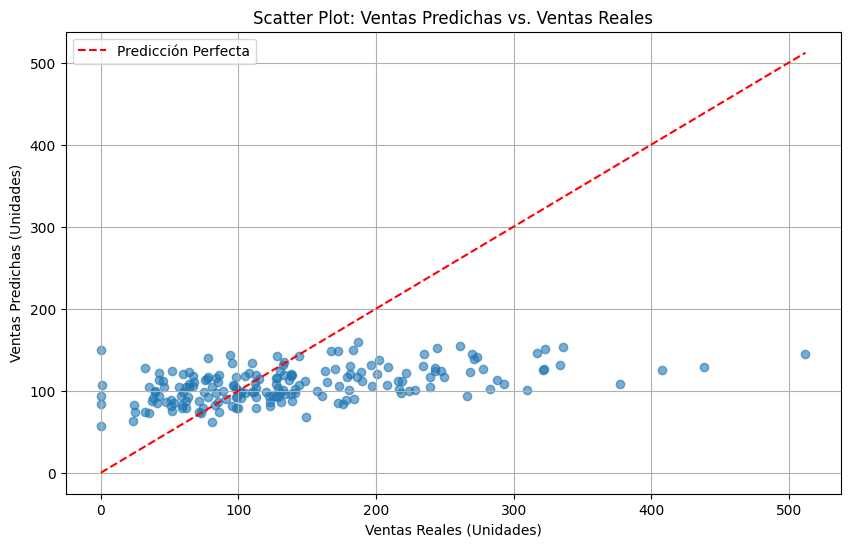

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción Perfecta')

plt.xlabel('Ventas Reales (Unidades)')
plt.ylabel('Ventas Predichas (Unidades)')
plt.title('Scatter Plot: Ventas Predichas vs. Ventas Reales')
plt.legend()
plt.grid(True)
plt.show()